In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [ ]:

# Step 1: Data Collection
data = pd.read_csv("PHtamilnadu2013.csv")


In [ ]:
data.head

<bound method NDFrame.head of     STATION CODE                                          LOCATIONS  \
0           1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...   
1           1159  TAMBIRAPARANI AT BDG.NR. MADURA COATS LTD.PAPA...   
2           1160  TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU   
3           1161  TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE,TAMI...   
4           1162            TAMBIRAPARANI AT MURAPPANADU, TAMILNADU   
5           1328             TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU   
6           1329  TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...   
7           1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU   
8           3025       TAMBIRAPARANI AT ERAL, THOTHUKUDI, TAMILNADU   
9           3026  TAMBIRAPARANI AT KALLIDAI KURICHI, TIRUNELVELI...   
10          3027  TAMBIRAPARANI AT SRIVAIKUNTAM, D/S OF SK ANAIC...   
11          3028  TAMBIRAPARANI AT VELLAKOIL, TIRUNELVELI, TAMIL...   
12          3029  TAMBIRAPARANI AT SIVALAPERI, 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION CODE  14 non-null     int64  
 1   LOCATIONS     14 non-null     object 
 2   STATE         14 non-null     object 
 3   TEMP_Min      14 non-null     float64
 4   TEMP_Max      14 non-null     int64  
 5   pH            14 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 800.0+ bytes


In [ ]:
data.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of     STATION CODE                                          LOCATIONS  \
0           1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...   
1           1159  TAMBIRAPARANI AT BDG.NR. MADURA COATS LTD.PAPA...   
2           1160  TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU   
3           1161  TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE,TAMI...   
4           1162            TAMBIRAPARANI AT MURAPPANADU, TAMILNADU   
5           1328             TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU   
6           1329  TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...   
7           1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU   
8           3025       TAMBIRAPARANI AT ERAL, THOTHUKUDI, TAMILNADU   
9           3026  TAMBIRAPARANI AT KALLIDAI KURICHI, TIRUNELVELI...   
10          3027  TAMBIRAPARANI AT SRIVAIKUNTAM, D/S OF SK ANAIC...   
11          3028  TAMBIRAPARANI AT VELLAKOIL, TIRUNELVELI, TAMIL...   
12          30

In [ ]:

# Step 2: Data Preprocessing
features = data[['TEMP_Min', 'TEMP_Max']]
labels = data['pH ']

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

sequence_length = 10
sequences = [np.array(features_scaled[i:i+sequence_length]) for i in range(len(features_scaled) - sequence_length + 1)]
labels = labels[sequence_length - 1:]

X = np.array(sequences)
y = np.array(labels)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: 1D CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 49.7698 - val_loss: 45.4355
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 48.4034 - val_loss: 44.2968
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 47.1324 - val_loss: 43.2013
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 45.9579 - val_loss: 42.1204
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 44.8244 - val_loss: 41.0651
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 43.7955 - val_loss: 40.0576
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 42.7664 - val_loss: 39.0437
Epoch 8/100
1/1 [==============================] - 0s 56ms/step - loss: 41.7622 - val_loss: 38.0958
Epoch 9/100
1/1 [==============================] - 0s 33ms/step - loss: 40.8245 - val_loss: 37.1905
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 39.9394 - val_loss: 36.2752
E

In [ ]:

# Step 4: Data Comparison
new_data = pd.read_csv("PHtamilnadu2014.csv")
new_features_scaled = scaler.transform(new_data[['TEMP_Min', 'TEMP_Max']])
new_sequences = [np.array(new_features_scaled[i:i+sequence_length]) for i in range(len(new_features_scaled) - sequence_length + 1)]
new_X = np.array(new_sequences)

predictions = model.predict(new_X)


1/1 [==============================] - 0s 104ms/step


In [ ]:

for i in range(len(predictions)):
    print(f"Predicted pH: {predictions[i][0]}, Actual pH: {new_data['pH '].iloc[i]}")


Predicted pH: 6.410774230957031, Actual pH: 7.4
Predicted pH: 6.210310935974121, Actual pH: 6.6
Predicted pH: 6.534379005432129, Actual pH: 6.4
Predicted pH: 6.689488887786865, Actual pH: 6.5
Predicted pH: 6.902892112731934, Actual pH: 6.9


In [ ]:
''' Using the data of PHtamilnadu2013 we are predicting the ph of next year i.e., 2014 and now we are comparing the actual data of 2014 and 2013'''

In [ ]:

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


1/1 [==============================] - 0s 23ms/step - loss: 0.0114
Test Loss: 0.011428063735365868


In [ ]:
'''above data represents total loss percentage that is occured after testing'''

In [ ]:

# Calculate additional evaluation metrics
predictions_test = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions_test)
rmse = mean_squared_error(y_test, predictions_test, squared=False)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


1/1 [==============================] - 0s 21ms/step
Mean Absolute Error: 0.10690231323242205
Root Mean Squared Error: 0.10690231323242205


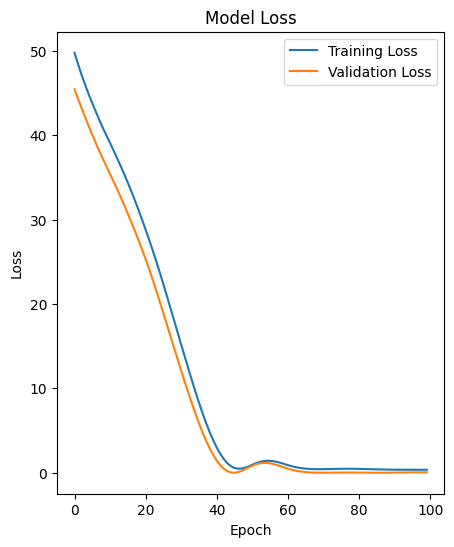

In [ ]:

# Plot training & validation loss values
plt.figure(figsize=(5, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model for future use
# model.save('water_quality_cnn_model.h5')

<ipython-input-13-9772de9b487f>:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, color='b', label='Actual pH', shade=True)
<ipython-input-13-9772de9b487f>:46: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(y_test, color='b', label='Actual pH', shade=True)
<ipython-input-13-9772de9b487f>:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions_test.reshape(-1), color='r', label='Predicted pH', shade=True)
<ipython-input-13-9772de9b487f>:47: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(predictions_test.reshape(-1), color='r', label='Predicted pH', shade=True)


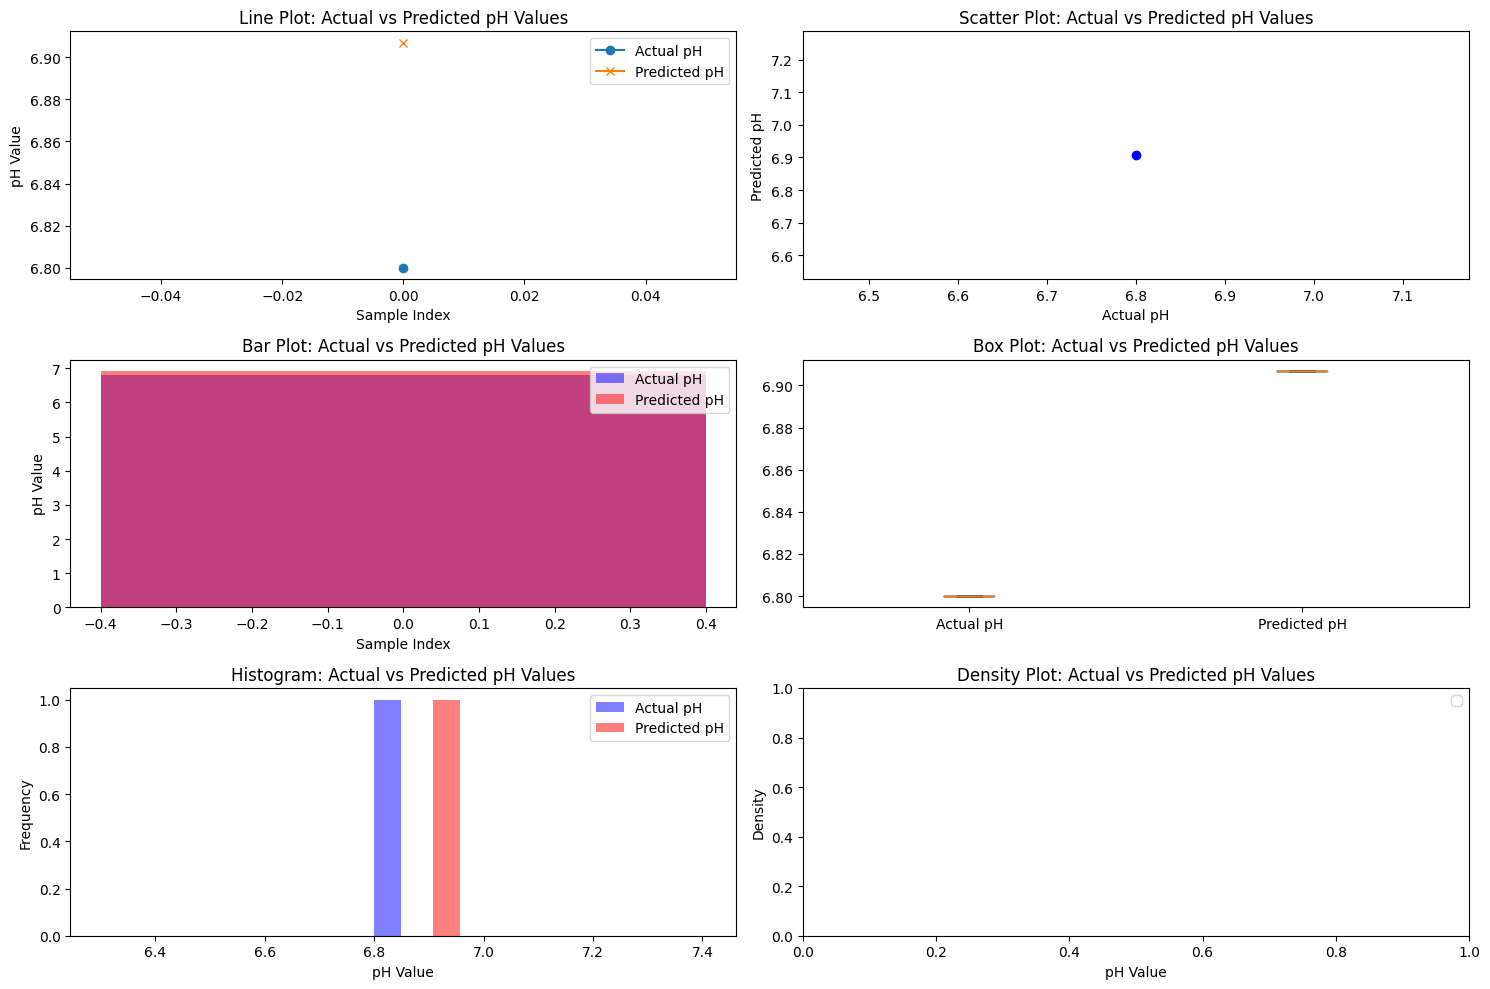

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(15, 10))

# Plot 1: Line Plot
plt.subplot(3, 2, 1)
plt.plot(y_test, label='Actual pH', marker='o')
plt.plot(predictions_test, label='Predicted pH', marker='x')
plt.title('Line Plot: Actual vs Predicted pH Values')
plt.xlabel('Sample Index')
plt.ylabel('pH Value')
plt.legend()

# Plot 2: Scatter Plot
plt.subplot(3, 2, 2)
plt.scatter(y_test, predictions_test, color='b')
plt.title('Scatter Plot: Actual vs Predicted pH Values')
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')

# Plot 3: Bar Plot
plt.subplot(3, 2, 3)
indices = range(len(y_test))
plt.bar(indices, y_test, color='b', alpha=0.5, label='Actual pH')
plt.bar(indices, predictions_test.reshape(-1), color='r', alpha=0.5, label='Predicted pH')
plt.title('Bar Plot: Actual vs Predicted pH Values')
plt.xlabel('Sample Index')
plt.ylabel('pH Value')
plt.legend()

# Plot 4: Box Plot
plt.subplot(3, 2, 4)
plt.boxplot([y_test, predictions_test.reshape(-1)], labels=['Actual pH', 'Predicted pH'])
plt.title('Box Plot: Actual vs Predicted pH Values')

# Plot 5: Histogram
plt.subplot(3, 2, 5)
plt.hist(y_test, bins=20, alpha=0.5, label='Actual pH', color='b')
plt.hist(predictions_test, bins=20, alpha=0.5, label='Predicted pH', color='r')
plt.title('Histogram: Actual vs Predicted pH Values')
plt.xlabel('pH Value')
plt.ylabel('Frequency')
plt.legend()

# Plot 6: Density Plot
plt.subplot(3, 2, 6)
sns.kdeplot(y_test, color='b', label='Actual pH', shade=True)
sns.kdeplot(predictions_test.reshape(-1), color='r', label='Predicted pH', shade=True)
plt.title('Density Plot: Actual vs Predicted pH Values')
plt.xlabel('pH Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Binning function to convert continuous pH values to classes
def bin_pH_values(pH):
    if pH < 6.5:
        return 'Low'
    elif 6.5 <= pH < 7.5:
        return 'Medium'
    else:
        return 'High'

# Convert continuous pH predictions into classes
y_pred_class = np.array([bin_pH_values(pH) for pH in predictions_test.reshape(-1)])
y_true_class = np.array([bin_pH_values(pH) for pH in y_test])

# Generate classification report
report = classification_report(y_true_class, y_pred_class)
print(report)
#checking whether the ph values are accurate or not

              precision    recall  f1-score   support

      Medium       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
''' from the above classification report we can determine that ph data of water is 100% accurate'''